<a href="https://colab.research.google.com/github/Madhuraaa22/PRODIGY_DS_03/blob/main/Prodigy_DS_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task-03: Decision Tree Classifier**

First 5 rows of the dataset:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  

Checking for missing values:
age          0
job          0
marital      0
educati

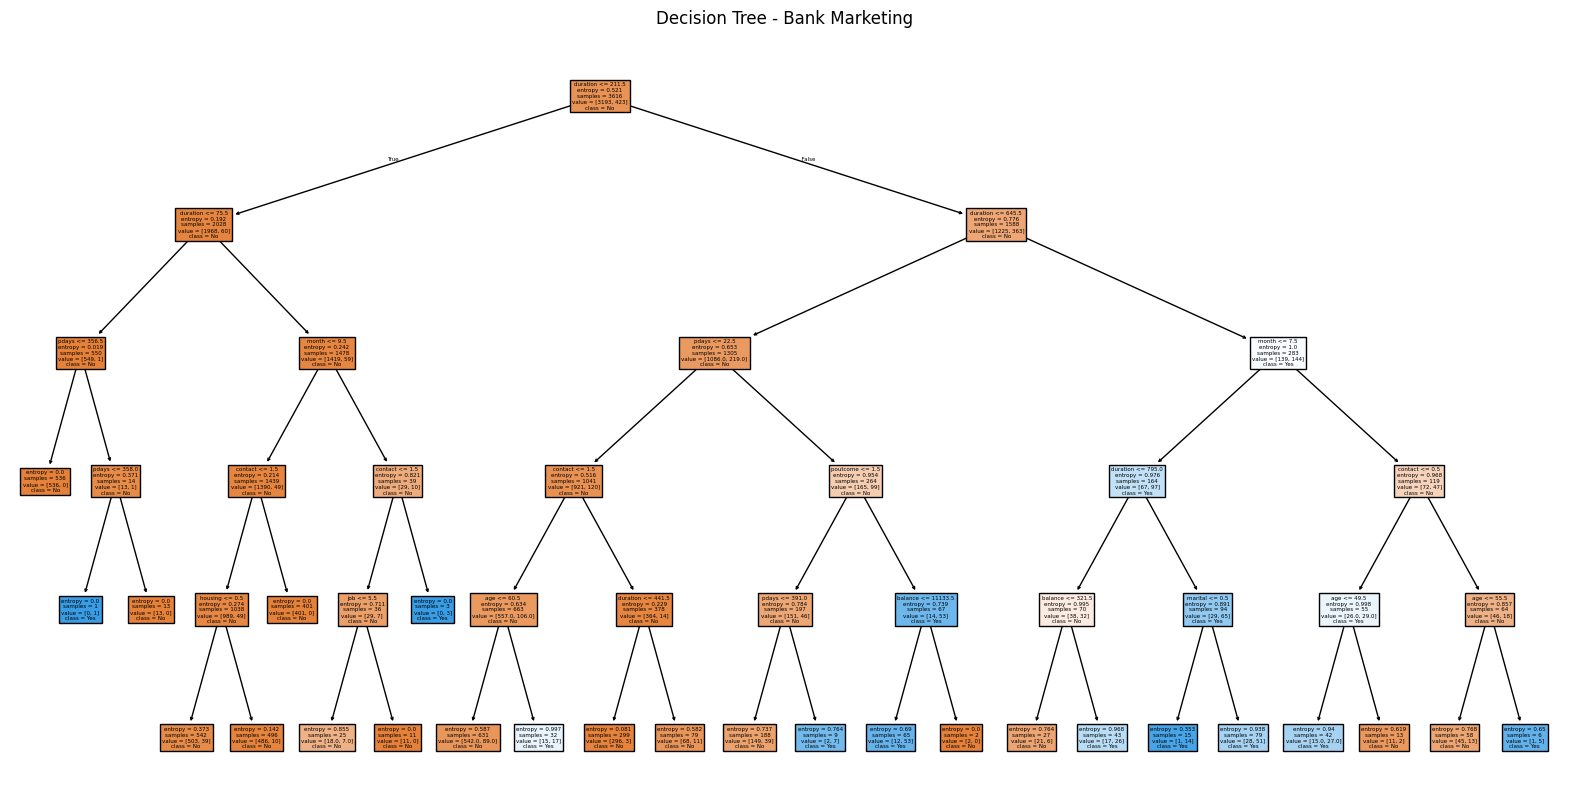

In [ ]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# STEP 2: Load Dataset
df = pd.read_csv("/content/bank.csv", sep=';')
print("First 5 rows of the dataset:")
print(df.head())

# STEP 3: Data Preprocessing
print("\nChecking for missing values:")
print(df.isnull().sum())

# Encode categorical columns
label_enc = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_enc.fit_transform(df[col])

print("\nData after encoding:")
print(df.head())

# STEP 4: Split Dataset
X = df.drop("y", axis=1)       # Features
y = df["y"]                    # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5: Train Decision Tree
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# STEP 6: Evaluate Model
y_pred = clf.predict(X_test)

print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# STEP 7: Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree - Bank Marketing")
plt.show()
